# Exploratory Data Analysis

## Data Preprocessing

Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Getting the dataset

In [2]:
path = "C:/Users/Dell/Desktop/coding/python/plants_and_bees.csv"
df = pd.read_csv(path)

In [3]:
df.describe()

,sample_id,species_num,time,parasitic,nonnative_bee
count,1250.000000,1250.000000,1250.000000,1187.000000,1189.000000
mean,17441.209600,22.450400,1069.160000,0.074136,0.029437
std,22.649293,13.691074,199.032524,0.262103,0.169098
min,17400.000000,1.000000,900.000000,0.000000,0.000000
25%,17424.000000,12.000000,930.000000,0.000000,0.000000
50%,17442.000000,20.000000,1015.000000,0.000000,0.000000
75%,17461.000000,32.000000,1105.000000,0.000000,0.000000
max,17481.000000,60.000000,1730.000000,1.000000,1.000000


In [4]:
dataset = pd.concat([df.head(), df.tail()])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   species_num     1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


In [6]:
def plant_bees_info():
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
plant_bees_info()

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
sample_id,int64,1250,0,0.00,80
species_num,int64,1250,0,0.00,34
date,object,1250,0,0.00,9
season,object,1250,0,0.00,2
site,object,1250,0,0.00,3
native_or_non,object,1250,0,0.00,2
sampling,object,1250,0,0.00,2
plant_species,object,1250,0,0.00,24
time,int64,1250,0,0.00,44
bee_species,object,1250,0,0.00,93


In [7]:
df = df.drop(['specialized_on','status'], axis = 1)

In [8]:
print(df.isnull().sum())

sample_id         0
species_num       0
date              0
season            0
site              0
native_or_non     0
sampling          0
plant_species     0
time              0
bee_species       0
sex               0
parasitic        63
nesting          54
nonnative_bee    61
dtype: int64


In [9]:
def convert_bool(val):
    return bool ( val )

In [10]:
df['nonnative_bee'] = df['nonnative_bee'].apply(lambda x: convert_bool(x))
df['parasitic'] = df['parasitic'].apply(lambda x: convert_bool(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample_id      1250 non-null   int64 
 1   species_num    1250 non-null   int64 
 2   date           1250 non-null   object
 3   season         1250 non-null   object
 4   site           1250 non-null   object
 5   native_or_non  1250 non-null   object
 6   sampling       1250 non-null   object
 7   plant_species  1250 non-null   object
 8   time           1250 non-null   int64 
 9   bee_species    1250 non-null   object
 10  sex            1250 non-null   object
 11  parasitic      1250 non-null   bool  
 12  nesting        1196 non-null   object
 13  nonnative_bee  1250 non-null   bool  
dtypes: bool(2), int64(3), object(9)
memory usage: 119.8+ KB


In [11]:
df[df['nonnative_bee']!=False].head()

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee
5,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
6,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
7,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
8,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
9,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True


In [12]:
print(df.isnull().sum())

sample_id         0
species_num       0
date              0
season            0
site              0
native_or_non     0
sampling          0
plant_species     0
time              0
bee_species       0
sex               0
parasitic         0
nesting          54
nonnative_bee     0
dtype: int64


In [13]:
df.nesting.unique()

array(['ground', 'hive', 'wood', 'parasite [ground]', 'wood/shell', nan,
       'wood/cavities'], dtype=object)

In [14]:
df["nesting"].fillna("No nesting", inplace = True) 
df.nesting.unique()

array(['ground', 'hive', 'wood', 'parasite [ground]', 'wood/shell',
       'No nesting', 'wood/cavities'], dtype=object)

In [15]:
print(df.isnull().sum())

sample_id        0
species_num      0
date             0
season           0
site             0
native_or_non    0
sampling         0
plant_species    0
time             0
bee_species      0
sex              0
parasitic        0
nesting          0
nonnative_bee    0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample_id      1250 non-null   int64 
 1   species_num    1250 non-null   int64 
 2   date           1250 non-null   object
 3   season         1250 non-null   object
 4   site           1250 non-null   object
 5   native_or_non  1250 non-null   object
 6   sampling       1250 non-null   object
 7   plant_species  1250 non-null   object
 8   time           1250 non-null   int64 
 9   bee_species    1250 non-null   object
 10  sex            1250 non-null   object
 11  parasitic      1250 non-null   bool  
 12  nesting        1250 non-null   object
 13  nonnative_bee  1250 non-null   bool  
dtypes: bool(2), int64(3), object(9)
memory usage: 119.8+ KB


In [17]:
df[df.duplicated()].shape[0]

599

In [18]:
df = df.drop_duplicates()

In [19]:
df.shape

(651, 14)

In [20]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 1243
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sample_id      651 non-null    int64         
 1   species_num    651 non-null    int64         
 2   date           651 non-null    datetime64[ns]
 3   season         651 non-null    object        
 4   site           651 non-null    object        
 5   native_or_non  651 non-null    object        
 6   sampling       651 non-null    object        
 7   plant_species  651 non-null    object        
 8   time           651 non-null    int64         
 9   bee_species    651 non-null    object        
 10  sex            651 non-null    object        
 11  parasitic      651 non-null    bool          
 12  nesting        651 non-null    object        
 13  nonnative_bee  651 non-null    bool          
dtypes: bool(2), datetime64[ns](1), int64(3), object(8)
memory usage: 67.4+ KB

In [21]:
plant_bees_info()

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
sample_id,int64,651,0,0.0,80
species_num,int64,651,0,0.0,34
date,datetime64[ns],651,0,0.0,9
season,object,651,0,0.0,2
site,object,651,0,0.0,3
native_or_non,object,651,0,0.0,2
sampling,object,651,0,0.0,2
plant_species,object,651,0,0.0,24
time,int64,651,0,0.0,44
bee_species,object,651,0,0.0,93


In [22]:
df.describe()

,sample_id,species_num,time
count,651.000000,651.000000,651.000000
mean,17440.874040,21.276498,1078.548387
std,22.654586,14.046200,208.262605
min,17400.000000,1.000000,900.000000
25%,17423.500000,9.000000,930.000000
50%,17441.000000,20.000000,1015.000000
75%,17461.000000,32.000000,1105.000000
max,17481.000000,60.000000,1730.000000


In [23]:
df

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee
0,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,False,ground,False
1,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,False,ground,False
3,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena carlini,f,False,ground,False
4,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena perplexa,m,False,ground,False
5,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,17480,15,2017-08-01,late.season,B,non-native,pan traps,None,1015,Lasioglossum callidum,f,False,ground,False
1233,17480,15,2017-08-01,late.season,B,non-native,pan traps,None,1015,Halictus poeyi/ligatus,f,False,ground,False
1236,17480,15,2017-08-01,late.season,B,non-native,pan traps,None,1015,Melissodes bimaculatus,m,False,ground,False
1237,17480,15,2017-08-01,late.season,B,non-native,pan traps,None,1015,Melissodes bimaculatus,f,False,ground,False


In [24]:
def plant_bees_info():
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp

In [25]:
data = df['bee_species'].value_counts()
data

Halictus poeyi/ligatus     74
Augochlorella aurata       42
Lasioglossum pilosum       32
Lasioglossum tegulare      27
Lasioglossum trigeminum    26
                           ..
Ceratina                    1
Lasioglossum pectorale      1
Agapostemon sericeus        1
Osmia taurus                1
Nomada vegana               1
Name: bee_species, Length: 93, dtype: int64

In [26]:
non_native = df[df.nonnative_bee == True]
native = df[df.nonnative_bee != True]

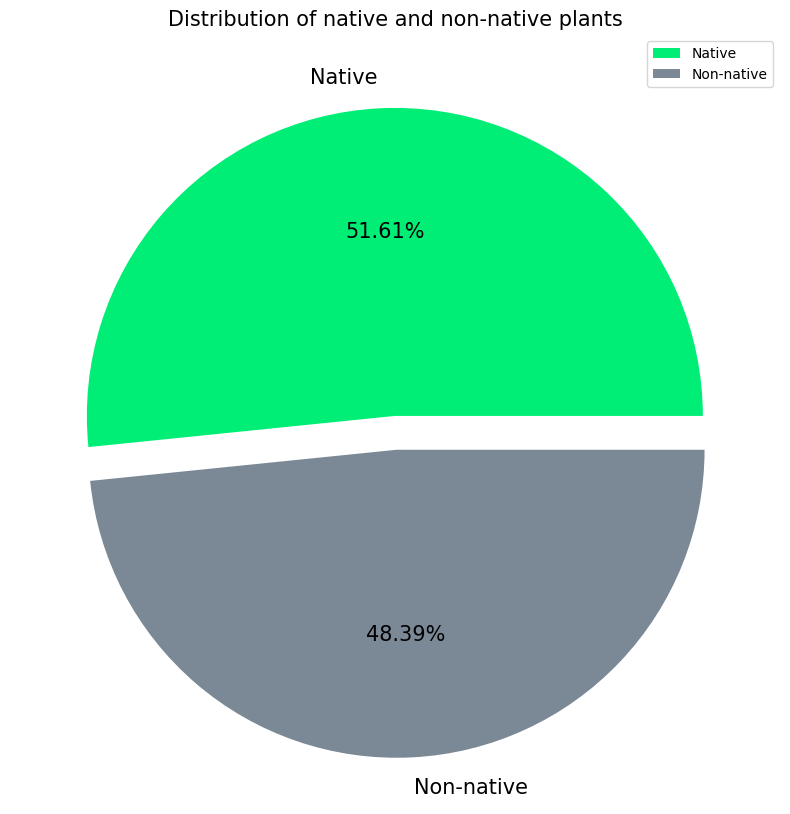

In [27]:
data = df['native_or_non'].value_counts()
labels = ['Native', 'Non-native']
plt.figure(figsize=(10,10))
colors = ['#00EE76', '#7B8895']
explode = (0.01, 0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', explode=explode, textprops={'fontsize': 15})
plt.title('Distribution of native and non-native plants', size = 15, loc='center')
plt.legend();

In [28]:
freq_table = pd.crosstab(df['bee_species'], df['native_or_non']) 
freq_table

native_or_non,native,non-native
bee_species,,
Agapostemon sericeus,1,0
Agapostemon splendens,4,7
Agapostemon texanus,11,8
Agapostemon virescens,7,1
Andrena (Trachandrena),1,2
...,...,...
Osmia sandhouseae,1,0
Osmia subfasciata,1,2
Osmia taurus,1,0


In [29]:
df

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee
0,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,False,ground,False
1,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,False,ground,False
3,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena carlini,f,False,ground,False
4,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena perplexa,m,False,ground,False
5,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,17480,15,2017-08-01,late.season,B,non-native,pan traps,None,1015,Lasioglossum callidum,f,False,ground,False
1233,17480,15,2017-08-01,late.season,B,non-native,pan traps,None,1015,Halictus poeyi/ligatus,f,False,ground,False
1236,17480,15,2017-08-01,late.season,B,non-native,pan traps,None,1015,Melissodes bimaculatus,m,False,ground,False
1237,17480,15,2017-08-01,late.season,B,non-native,pan traps,None,1015,Melissodes bimaculatus,f,False,ground,False


In [30]:
df['sample_id'].value_counts()

17430    20
17446    18
17464    15
17423    15
17462    14
         ..
17477     2
17420     1
17412     1
17435     1
17481     1
Name: sample_id, Length: 80, dtype: int64

In [31]:
x1 = native[native.native_or_non == 'native']
x2 = native[native.native_or_non != 'native']
y1 = non_native[non_native.native_or_non == 'native']
y2 = non_native[non_native.native_or_non != 'native']
x1

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee
0,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,False,ground,False
1,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,False,ground,False
3,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena carlini,f,False,ground,False
4,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena perplexa,m,False,ground,False
11,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Lasioglossum tegulare,f,False,ground,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,17479,4,2017-08-02,late.season,B,native,hand netting,Helenium flexuosum,1020,Halictus poeyi/ligatus,f,False,ground,False
1218,17479,4,2017-08-02,late.season,B,native,hand netting,Helenium flexuosum,1020,Augochloropsis metallica_metallica,f,False,ground,False
1221,17479,9,2017-08-02,late.season,B,native,hand netting,Chamaecrista fasciculata,1020,Bombus impatiens,f,False,ground,False
1227,17479,9,2017-08-02,late.season,B,native,hand netting,Chamaecrista fasciculata,1020,Lasioglossum hitchensi,f,False,ground,False


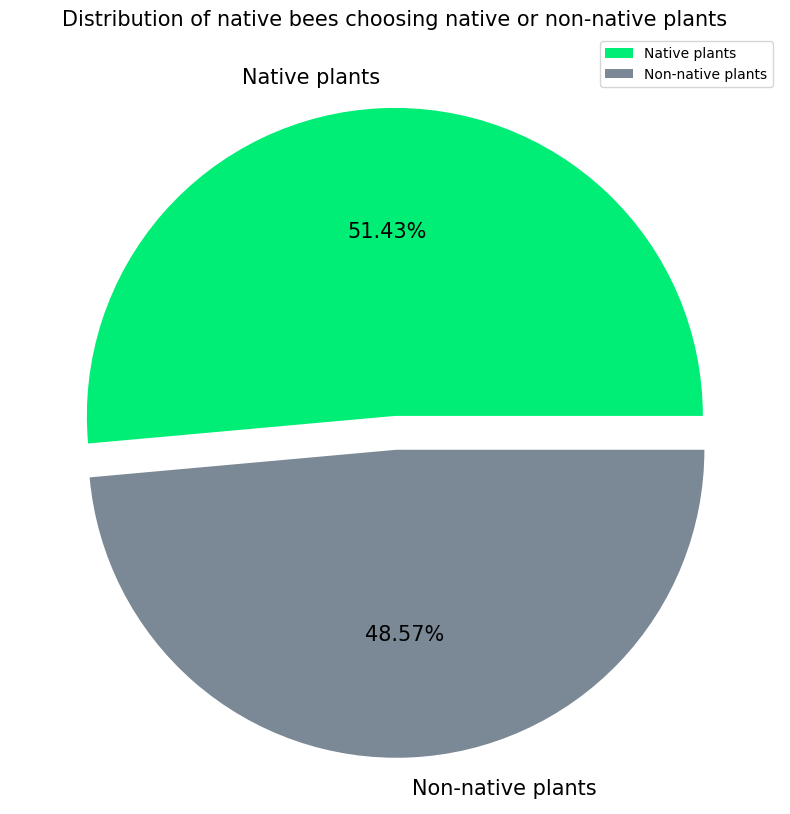

In [32]:
data = native['native_or_non'].value_counts()
labels = ['Native plants', 'Non-native plants']
plt.figure(figsize=(10,10))
colors = ['#00EE76', '#7B8895']
explode = (0.01, 0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', explode=explode, textprops={'fontsize': 15})
plt.title('Distribution of native bees choosing native or non-native plants', size = 15, loc='center')
plt.legend();

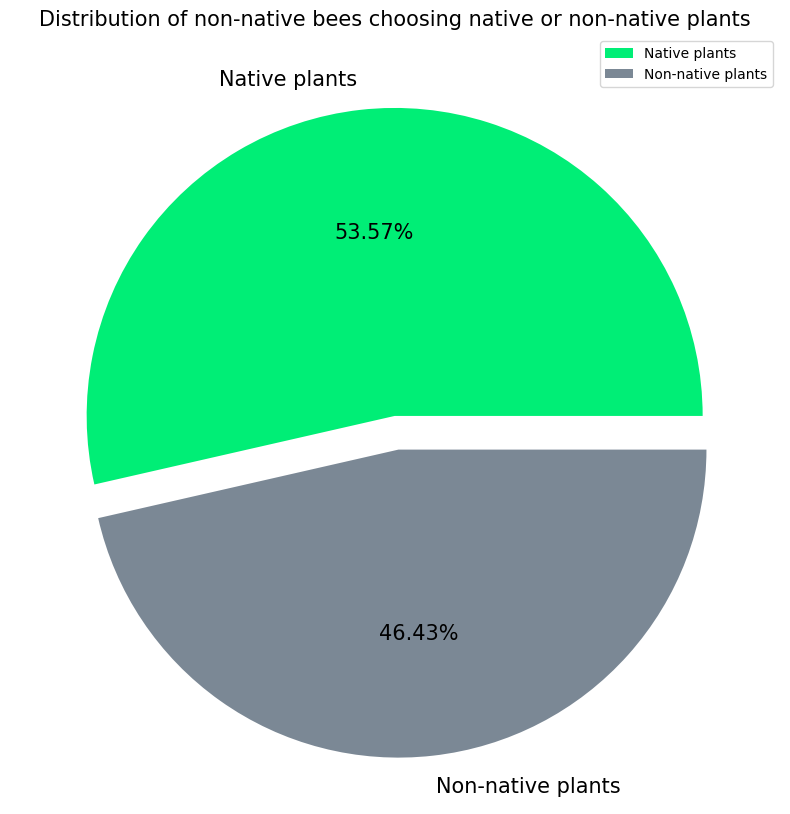

In [33]:
data = non_native['native_or_non'].value_counts()
labels = ['Native plants', 'Non-native plants']
plt.figure(figsize=(10,10))
colors = ['#00EE76', '#7B8895']
explode = (0.01, 0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', explode=explode, textprops={'fontsize': 15})
plt.title('Distribution of non-native bees choosing native or non-native plants', size = 15, loc='center')
plt.legend();

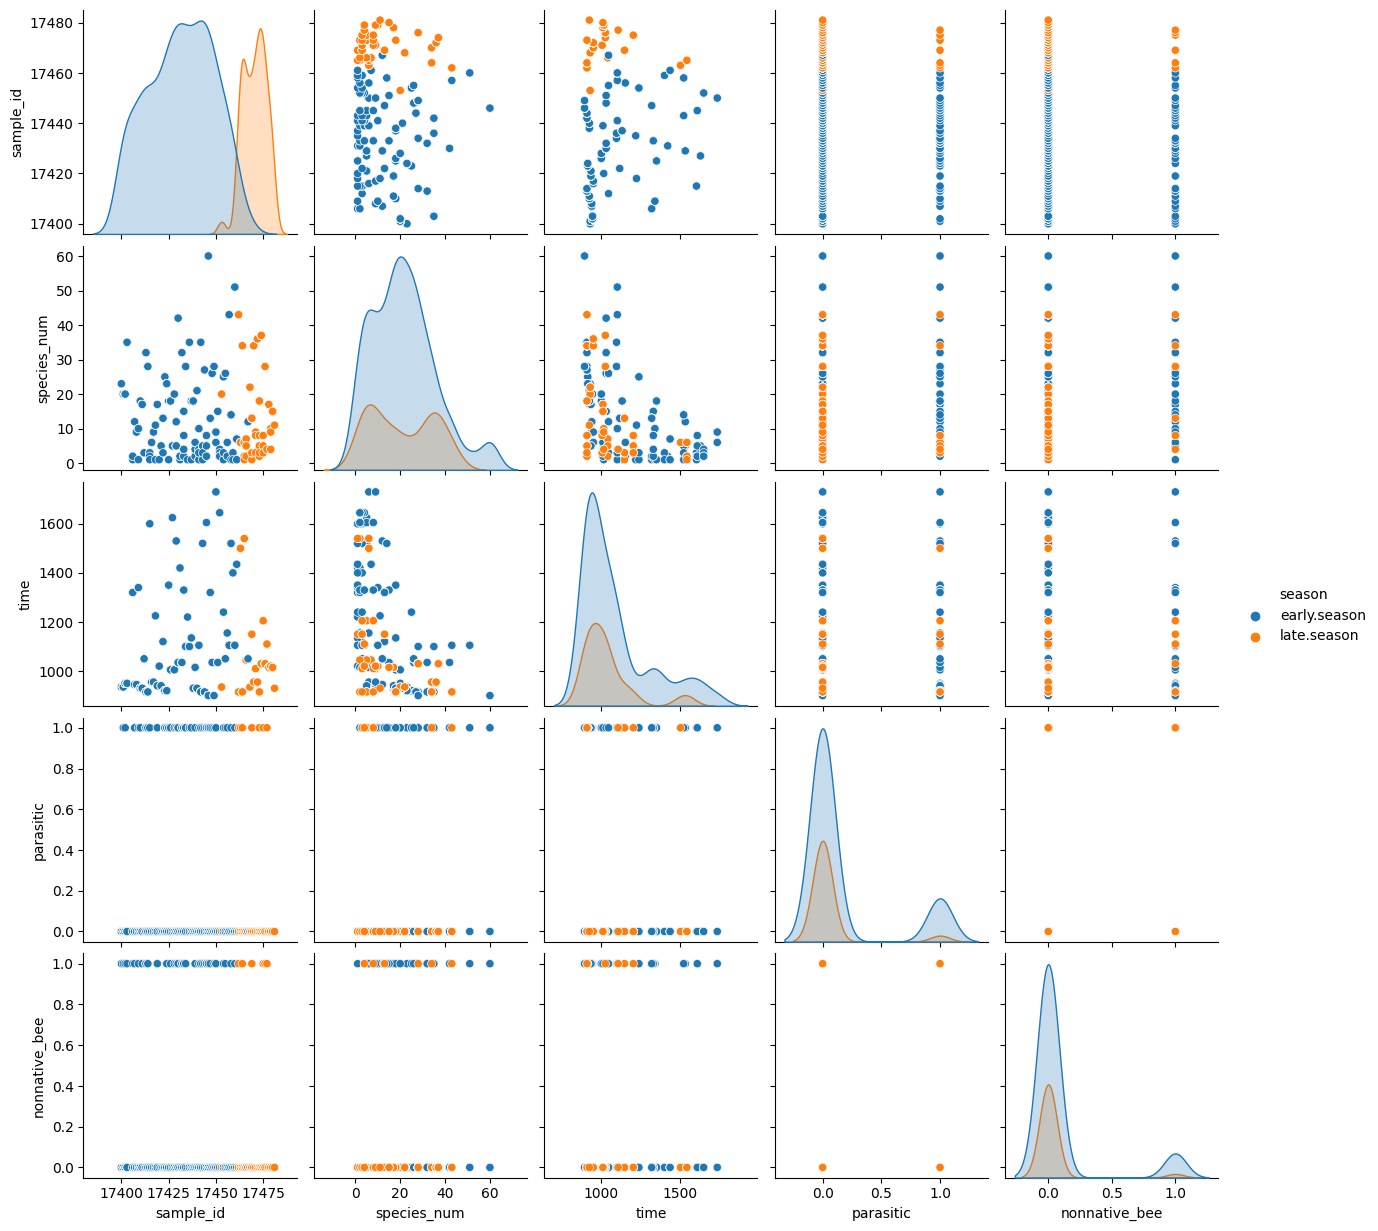

In [36]:
sns.pairplot(df, hue='season');